In [1]:
import pandas as pd

In [14]:
df = pd.read_csv('data.csv')
df.sample(5)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
56,57,6.3,3.3,4.7,1.6,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
94,95,5.6,2.7,4.2,1.3,Iris-versicolor
104,105,6.5,3.0,5.8,2.2,Iris-virginica


In [27]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['Species_num'] = label.fit_transform(df['Species'])
df.sample(5)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_num
70,71,5.9,3.2,4.8,1.8,Iris-versicolor,1
57,58,4.9,2.4,3.3,1.0,Iris-versicolor,1
88,89,5.6,3.0,4.1,1.3,Iris-versicolor,1
81,82,5.5,2.4,3.7,1.0,Iris-versicolor,1
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


In [28]:
df0=df[df.Species_num==0]
df1=df[df.Species_num==1]
df2=df[df.Species_num==2]


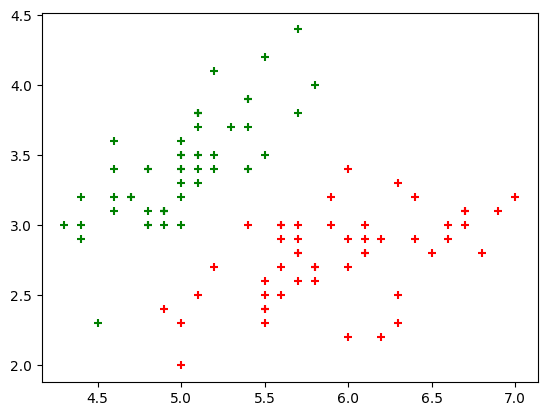

In [29]:
from matplotlib import pyplot as plt
plt.scatter(df0['SepalLengthCm'],df0['SepalWidthCm'],color='green',marker='+')
plt.scatter(df1['SepalLengthCm'],df1['SepalWidthCm'],color='red',marker='+')


In [33]:
input = df.drop(['Species','Species_num'],axis='columns')
input.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
139,140,6.9,3.1,5.4,2.1
113,114,5.7,2.5,5.0,2.0
7,8,5.0,3.4,1.5,0.2
73,74,6.1,2.8,4.7,1.2
145,146,6.7,3.0,5.2,2.3


In [34]:
target = df['Species_num']
target.sample(5)

20    0
36    0
0     0
17    0
72    1
Name: Species_num, dtype: int32

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(input,target,test_size=0.2)
len(y_test)

30

In [37]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(x_train,y_train)

SVC()

In [38]:
model.score(x_test,y_test)

1.0

In [39]:
x_test[:10]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
92,93,5.8,2.6,4.0,1.2
126,127,6.2,2.8,4.8,1.8
32,33,5.2,4.1,1.5,0.1
54,55,6.5,2.8,4.6,1.5
146,147,6.3,2.5,5.0,1.9
22,23,4.6,3.6,1.0,0.2
121,122,5.6,2.8,4.9,2.0
142,143,5.8,2.7,5.1,1.9
68,69,6.2,2.2,4.5,1.5
0,1,5.1,3.5,1.4,0.2


In [40]:
y_test[:10]

C:\Users\mpatil112376\AppData\Local\Temp\ipykernel_21928\2588316582.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test[:10]


92     1
126    2
32     0
54     1
146    2
22     0
121    2
142    2
68     1
0      0
Name: Species_num, dtype: int32

In [42]:
model.predict(x_test[:10])

array([1, 2, 0, 1, 2, 0, 2, 2, 1, 0])